In [30]:
import IPython
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [31]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test_post_competition.csv")

In [32]:
train.head()

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1


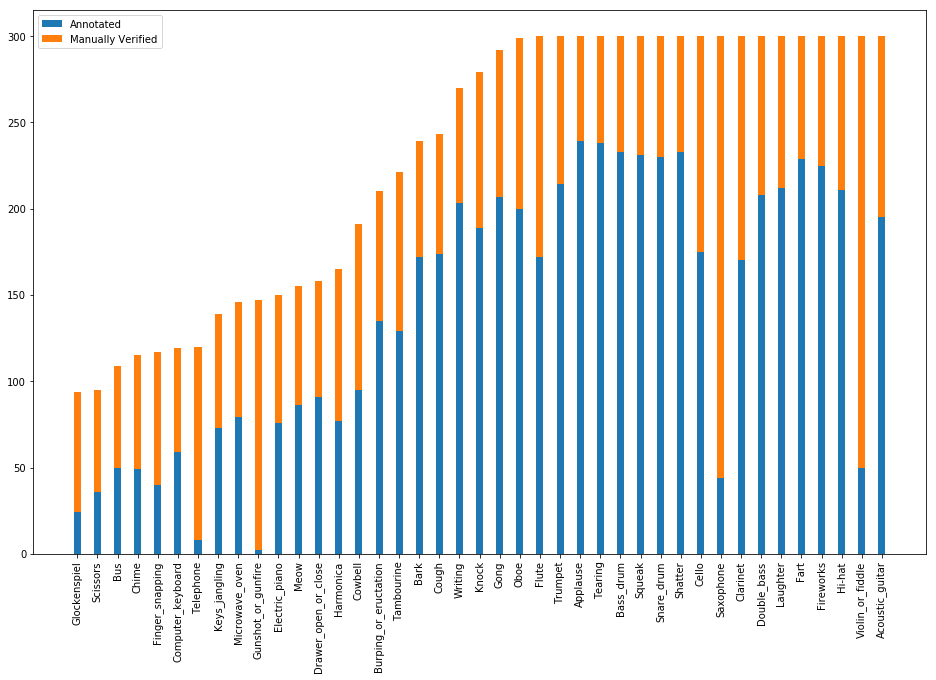

In [67]:
label_data = train.drop(['fname'],axis=1)
# print(label_data[label_data['manually_verified']==0].groupby('label').count())
zeros_per_category = np.array(label_data[label_data['manually_verified']==0].groupby('label').count())
ones_per_category = np.array(label_data[label_data['manually_verified']==1].groupby('label').count())
zeros_per_category = np.reshape(zeros_per_category, (zeros_per_category.shape[0]))
ones_per_category = np.reshape(ones_per_category, (ones_per_category.shape[0]))


width = 0.35
index = label_data[label_data['manually_verified']==0].groupby('label').count().index
index = np.array(index)
sums = zeros_per_category + ones_per_category
indices = sums.argsort()
zeros_per_category = zeros_per_category[indices]
ones_per_category = ones_per_category[indices]
index  = index[indices]
plt.figure(figsize = (16,10))
p1 = plt.bar(index, zeros_per_category, width)
p2 = plt.bar(index, ones_per_category, width,bottom=zeros_per_category)
plt.xticks(index,rotation='vertical')
plt.legend((p1[0], p2[0]), ('Annotated', 'Manually Verified'))
plt.show()
# print(nonverified)
# plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
#           .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,10))

# plot.set_xlabel("Category")
# plot.set_ylabel("Number of Samples");